In [1]:
#Importing all needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error as mse

In [2]:
#Transforming the TFP.csv file as a DataFrame
tfp = pd.read_csv('TFP.csv')

In [3]:
#Separating each IsoCode by Country in a different DataFrame
usa = tfp[tfp['isocode'] == 'USA']
mex = tfp[tfp['isocode'] == 'MEX']
can = tfp[tfp['isocode'] == 'CAN']

In [4]:
#Transforming the multiple DataFrame's in one with multiple columns of RTFPNA
tfp = usa.drop('isocode', axis = 1)
tfp['rtfpna_mex'] = list(mex['rtfpna'])
tfp['rtfpna_can'] = list(can['rtfpna'])
tfp = tfp.rename(columns={'rtfpna':'rtfpna_usa'})

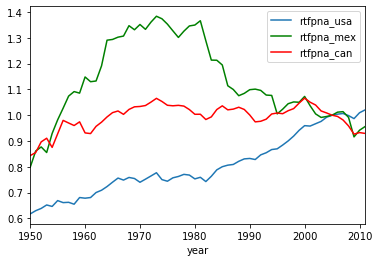

In [5]:
#Beggining the EDA
#Creating a graphic with multiple lines to search for similarities
#How each line have different properties, i choice to make one model for each value of IsoCode
ax = plt.gca()

tfp.plot(kind='line',x='year',y='rtfpna_usa',ax=ax)
tfp.plot(kind='line',x='year',y='rtfpna_mex', color='green', ax=ax)
tfp.plot(kind='line',x='year',y='rtfpna_can', color='red', ax=ax)

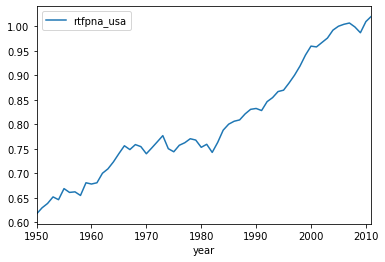

In [6]:
#Starting with the USA
#Single plot of RTFPNA column
tfp.plot('year', 'rtfpna_usa')

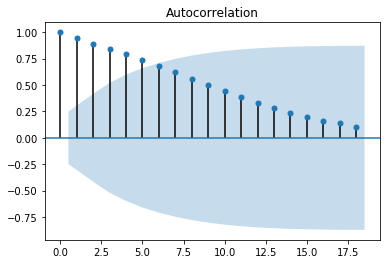

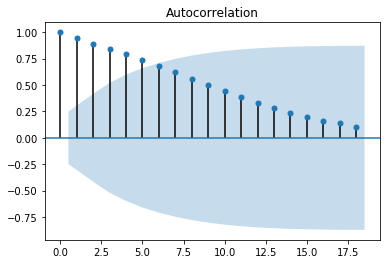

In [7]:
#Plot of Autocorrelation of the values from RTFPNA column
plot_acf(tfp['rtfpna_usa'])

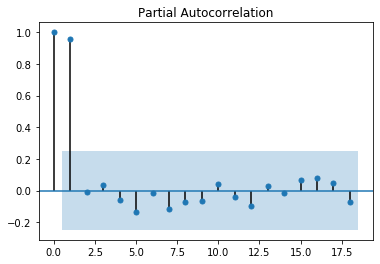

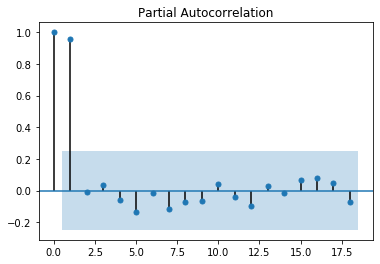

In [8]:
#Plot of Partial Autocorrelation of the values from RTFPNA column
plot_pacf(tfp['rtfpna_usa'])

In [9]:
#Separating the valid, test and train datasets, 5 values for valid and test, to the train data keep the relation between the prediction
test_set = tfp['rtfpna_usa'][52:57]
valid_set = tfp['rtfpna_usa'][57:]
data = tfp['rtfpna_usa'][:52]

In [10]:
#Defining the model used to make the predictions, ARIMA is the choice
#Some tests are make with diferent values and the best value found is 5 and 6 for p variable
#5 = Test(0.015084768799375273) + Valid(0.016593366130720502)
#6 = Test(0.008237186521620024) + Valid(0.018811824348213838)
#The final best value is 5 because is the more stable for future predictions
model = ARIMA(data, order=(5,0,0))
model_fit = model.fit()
pred = model_fit.predict(len(data), len(data) + 4, typ='levels')
rmse = mse(test_set, pred)**0.5
print(rmse)

0.015084768799375273


/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [11]:
#Making the real future prediction with all values for 10 future years
data = tfp['rtfpna_usa']
model = ARIMA(data, order=(5,0,0))
model_fit = model.fit()
pred_usa = model_fit.predict(len(data), len(data) + 9, typ='levels')
print(pred_usa)

62    1.022906
63    1.022607
64    1.028316
65    1.031953
66    1.033871
67    1.034754
68    1.036549
69    1.037884
70    1.038812
71    1.039401
dtype: float64


/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


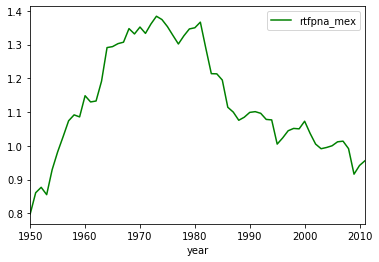

In [12]:
#Now with the MEX
#Single plot of RTFPNA column
tfp.plot('year', 'rtfpna_mex', color='green')

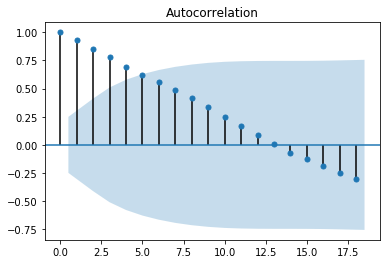

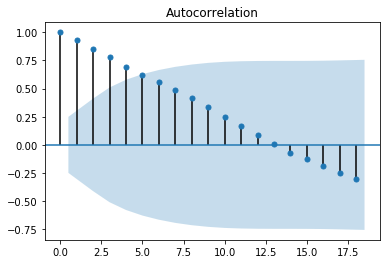

In [13]:
#Plot of Autocorrelation of the values from RTFPNA column
#With this plot, i can see if the series have some linearity or if it is randomic
plot_acf(tfp['rtfpna_mex'])

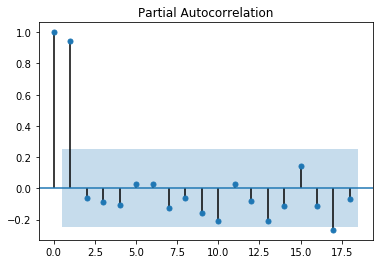

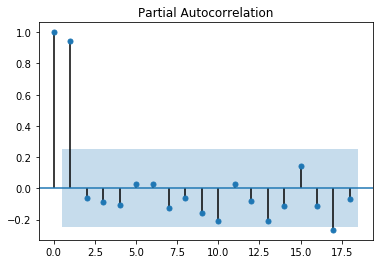

In [14]:
#Plot of Partial Autocorrelation of the values from RTFPNA column
#With this plot, we have an most detailed information about how type of time series we are working and what model use for predict it.
plot_pacf(tfp['rtfpna_mex'])

In [15]:
#Separating the valid, test and train datasets, 5 values for valid and test, to the train data keep the relation between the prediction
test_set = tfp['rtfpna_mex'][52:57]
valid_set = tfp['rtfpna_mex'][57:]
data = tfp['rtfpna_mex'][:52]

In [16]:
#Defining the model used to make the predictions, ARIMA is the choice because the result of the autocorrelation plots
#Some tests are make with diferent values and the best value found is 1, 2 and 3 for p variable
#1 = Test(0.03487000155878684) + Valid(0.058209684018492074)
#2 = Test(0.022838788679686688) + Valid(0.06370325261896413)
#3 = Test(0.023441955462940166) + Valid(0.06505122919849775)
#The final best value is 1 because is the more stable for future predictions
model = ARIMA(data, order=(1,0,0))
model_fit = model.fit()
pred = model_fit.predict(len(data), len(data) + 4, typ='levels')
rmse = mse(test_set, pred)**0.5
print(rmse)

0.03487000155878684


In [17]:
#Making the real future prediction with all values for 10 future years
data = tfp['rtfpna_mex']
model = ARIMA(data, order=(1,0,0))
model_fit = model.fit()
pred_mex = model_fit.predict(len(data), len(data) + 9, typ='levels')
print(pred_mex)

62    0.956058
63    0.956345
64    0.956626
65    0.956902
66    0.957173
67    0.957439
68    0.957700
69    0.957955
70    0.958207
71    0.958453
dtype: float64


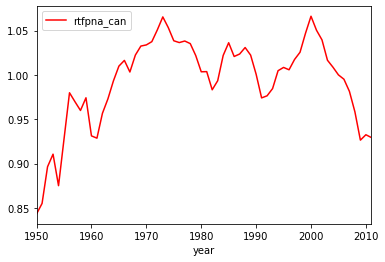

In [18]:
#And last with the CAN
#Single plot of RTFPNA column
tfp.plot('year', 'rtfpna_can', color='red')

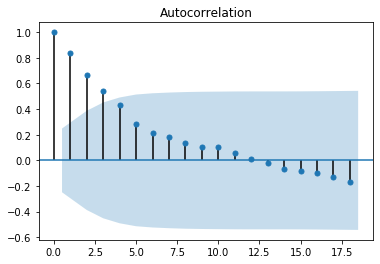

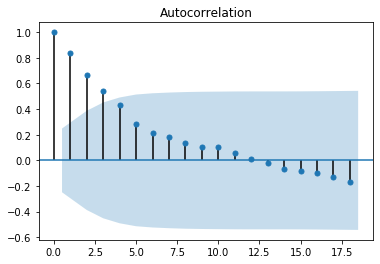

In [19]:
#Plot of Autocorrelation of the values from RTFPNA column
plot_acf(tfp['rtfpna_can'])

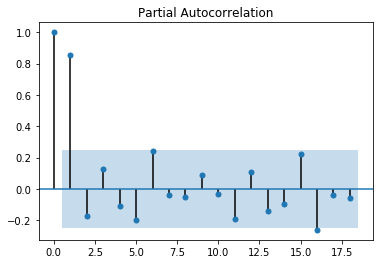

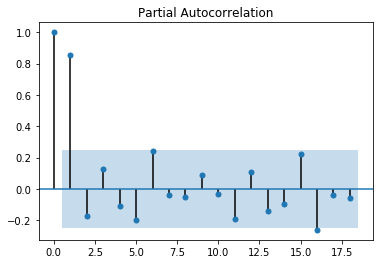

In [20]:
#Plot of Partial Autocorrelation of the values from RTFPNA column
plot_pacf(tfp['rtfpna_can'])

In [21]:
#Separating the valid, test and train datasets, 5 values for valid and test, to the train data keep the relation between the prediction
test_set = tfp['rtfpna_can'][52:57]
valid_set = tfp['rtfpna_can'][57:]
data = tfp['rtfpna_can'][:52]

In [22]:
#Defining the model used to make the predictions, ARIMA is the choice
#Some tests are make with diferent values and the best value found is 4 for p variable and 4 for q variable
#4 p variable = Test(0.03115494437492693) + Valid(0.04564523447831436)
#4 q variable = Test(0.010069774716261394) + Valid(0.05132983980050336)
#The final best value is 4 for p variable because is the more stable for future predictions
model = ARIMA(data, order=(4,0,0))
model_fit = model.fit()
pred = model_fit.predict(len(data), len(data) + 4, typ='levels')
rmse = mse(test_set, pred)**0.5
print(rmse)

0.03115494437492693


In [23]:
#Making the real future prediction with all values for 10 future years
data = tfp['rtfpna_can']
model = ARIMA(data, order=(4,0,0))
model_fit = model.fit()
pred_can = model_fit.predict(len(data), len(data) + 9, typ='levels')
print(pred_can)

62    0.918582
63    0.919898
64    0.924908
65    0.925259
66    0.926608
67    0.930693
68    0.933835
69    0.936000
70    0.938788
71    0.941626
dtype: float64


In [35]:
#Generating the final dataframe
tfp_preds = pd.DataFrame()
tfp_preds['year'] = range(2011,2021)
tfp_preds['rtfpna_usa'] = list(pred_usa)
tfp_preds['rtfpna_mex'] = list(pred_mex)
tfp_preds['rtfpna_can'] = list(pred_can)
print(tfp_preds)

   year  rtfpna_usa  rtfpna_mex  rtfpna_can
0  2011    1.022906    0.956058    0.918582
1  2012    1.022607    0.956345    0.919898
2  2013    1.028316    0.956626    0.924908
3  2014    1.031953    0.956902    0.925259
4  2015    1.033871    0.957173    0.926608
5  2016    1.034754    0.957439    0.930693
6  2017    1.036549    0.957700    0.933835
7  2018    1.037884    0.957955    0.936000
8  2019    1.038812    0.958207    0.938788
9  2020    1.039401    0.958453    0.941626
